In [23]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as Axes3d
from PIL import Image
from torch import nn, optim, reshape
import random

In [14]:
transform = transforms.Compose([transforms.ToTensor()
                              ])

In [15]:
trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform= transform)
subset_indices = torch.randperm(len(trainset))[:1000]
mnist_subset = torch.utils.data.Subset(trainset, subset_indices)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 91468467.28it/s]

Extracting ..\input\MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 228557912.88it/s]

Extracting ..\input\MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 16280500.28it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 44303555.27it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



In [16]:
len(mnist_subset)

1000

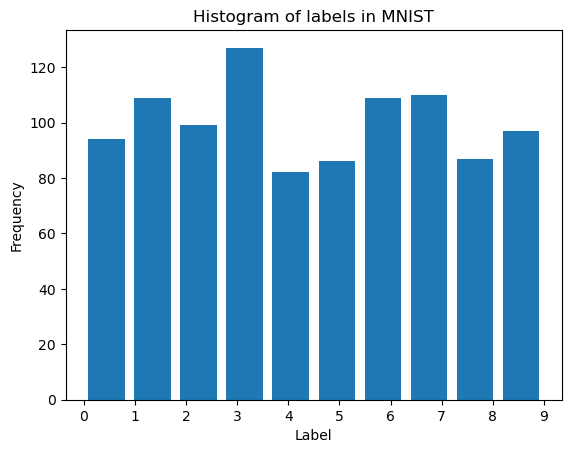

In [17]:
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]

# plot the histogram of the labels
plt.hist(labels, bins=10, range=(0, 9), align='mid', rwidth=0.8)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of labels in MNIST')
plt.xticks(range(10))
plt.show()

In [18]:
dataloader = torch.utils.data.DataLoader(mnist_subset, batch_size=25,shuffle=True)

In [19]:
mnist_subset[0][0][0][12][12].item()

0.250980406999588

In [20]:
all_data = torch.empty((len(dataloader), 25, 1, 28, 28))
for i, b in enumerate(dataloader):
    all_data[i] = b[0]

In [21]:
all_data.shape

torch.Size([40, 25, 1, 28, 28])

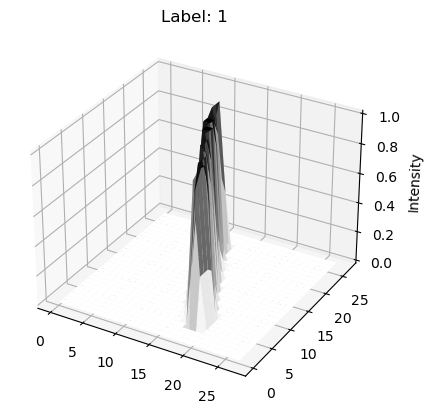

In [22]:
random_idx = torch.randint(len(trainset), size=(1,)).item()
image, label = trainset[random_idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

image_np = image.squeeze().numpy()
image_np_3d = np.zeros((28, 28, 3))
image_np_3d[:, :, 0] = image_np

# Extract the x, y, and z coordinates
x = np.arange(28)
y = np.arange(28)
x, y = np.meshgrid(x, y)
z = image_np_3d[:, :, 0]


# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='Greys', linewidth=0)

# Set the z axis limits and labels
ax.set_zlim(0, 1)
ax.set_zlabel('Intensity')

# Show the plot
plt.title(f'Label: {label}')
plt.show()